# 太陽能資訊

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
base_path = './02_data/'

In [3]:
import json
ffn = os.path.join(base_path, 'plant02_month_2023-05.json')
with open(ffn, 'r') as f:
    data = json.load(f)
    

In [4]:
data = data['data']

In [5]:
data.keys()

dict_keys(['capacity', 'date', 'day_e', 'deg4kw', 'inv_cap', 'inv_e', 'sun', 'total_e'])

### 畫出整廠的發電

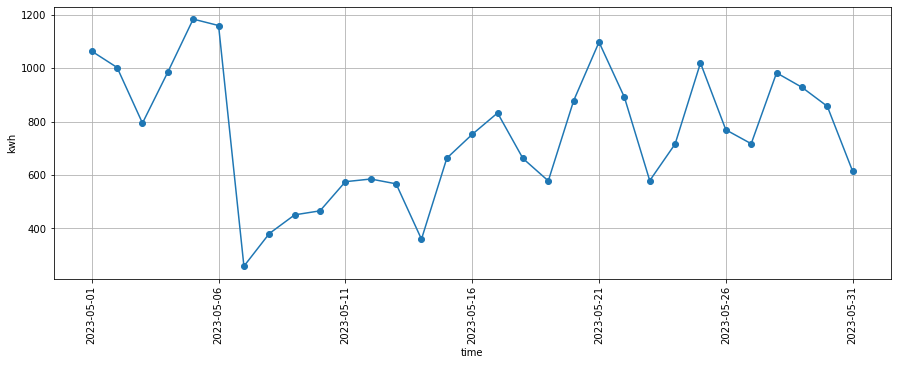

In [8]:
plt.subplots(figsize=(15,5))
plt.plot(data['date'], data['total_e'], '-o')
plt.xlabel('time')
plt.ylabel('kwh')
plt.xticks(data['date'][::5], rotation=90)
plt.grid()
plt.show()

### 和日發電量一樣
- 我們一般會把數據uni-form
- 除以整個設置容量: kWh/capacity=kWh/kWp = deg4kw

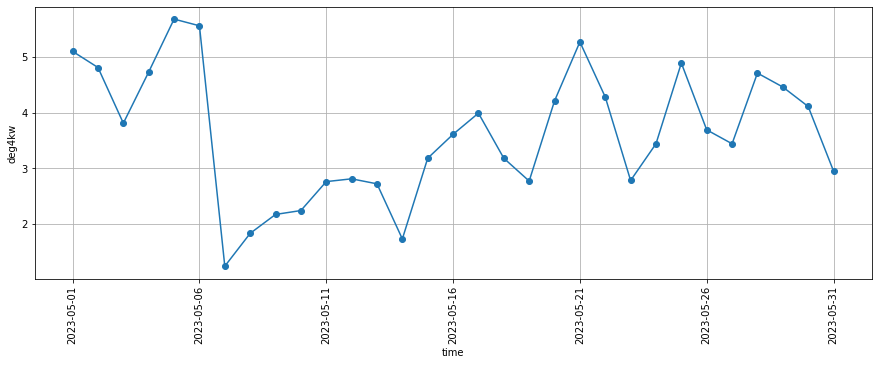

In [10]:
plt.subplots(figsize=(15,5))
plt.plot(data['date'], data['deg4kw'], '-o')
plt.xlabel('time')
plt.ylabel('deg4kw')
plt.xticks(data['date'][::5], rotation=90)
plt.grid()
plt.show()

### 把日照的資訊加進來

In [11]:
for i in range(len(data['sun'])):
    data['sun'][i]/=1000

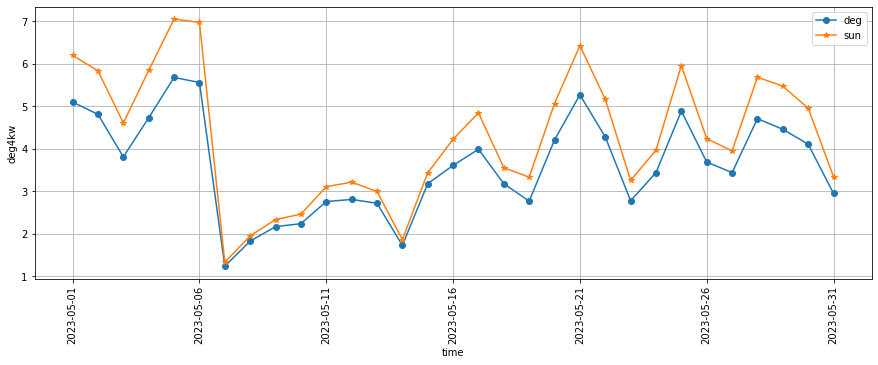

In [12]:
plt.subplots(figsize=(15,5))
plt.plot(data['date'], data['deg4kw'], '-o', label='deg')
plt.plot(data['date'], data['sun'], '-*', label='sun')
plt.xlabel('time')
plt.ylabel('deg4kw')
plt.xticks(data['date'][::5], rotation=90)
plt.grid()
plt.legend()
plt.show()

### 每一台都發電的很好嗎?

In [17]:
day_e = data['day_e'].copy()
for n in range(len(day_e)):
    for i in range(len(day_e[n])):
        day_e[n][i]/=data['inv_cap'][n]

In [18]:
day_e

[[5.26007326007326,
  4.9523809523809526,
  3.868131868131868,
  4.893772893772894,
  5.816849816849817,
  5.728937728937729,
  1.2307692307692308,
  1.8168498168498168,
  2.1684981684981683,
  2.2564102564102564,
  2.7838827838827838,
  2.827838827838828,
  2.73992673992674,
  1.728937728937729,
  3.1794871794871793,
  3.6483516483516483,
  4.102564102564102,
  3.1648351648351647,
  2.8424908424908426,
  4.249084249084249,
  5.230769230769231,
  4.249084249084249,
  2.769230769230769,
  3.4725274725274726,
  4.8791208791208796,
  3.6776556776556775,
  3.4432234432234434,
  4.717948717948718,
  4.556776556776557,
  4.102564102564102,
  2.9450549450549453],
 [4.926936505883875,
  4.603646708909867,
  3.788956420535368,
  4.4613991982413035,
  5.58644769171085,
  5.418336997284366,
  1.2672960041381094,
  1.8750808224492435,
  2.14664425190741,
  2.1725074356653304,
  2.715634294581663,
  2.7802922539764645,
  2.6897711108237425,
  1.7457649036596405,
  3.2199663778611147,
  3.5561877667

In [22]:
len(day_e[0])

31

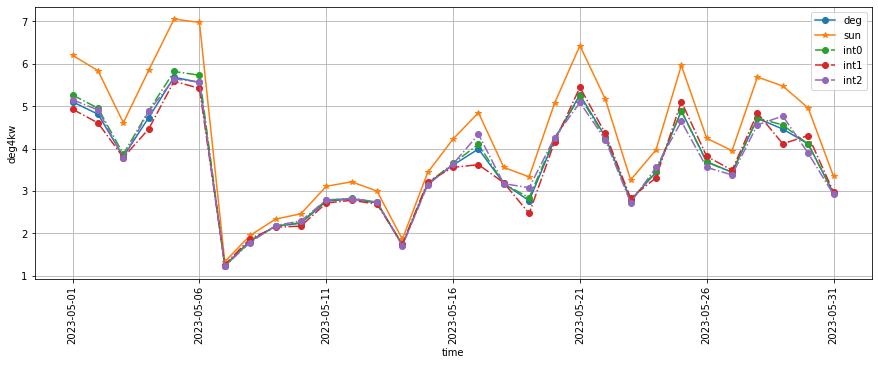

In [24]:
plt.subplots(figsize=(15,5))
plt.plot(data['date'], data['deg4kw'], '-o', label='deg')
plt.plot(data['date'], data['sun'], '-*', label='sun')
for n in range(len(day_e)):
    plt.plot(data['date'], day_e[n], '-.o', label='int'+str(n))
plt.xlabel('time')
plt.ylabel('deg4kw')
plt.xticks(data['date'][::5], rotation=90)
plt.grid()
plt.legend()
plt.show()